In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import torch

C:\Users\loren\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\loren\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("../solutions/galaxyquasar.csv")
data

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


In [3]:
# i create the arrays for the colors
u_g = np.array(data['u'] - data['g'])
g_r = np.array(data['g'] - data['r'])
r_i = np.array(data['r'] - data['i'])
i_z = np.array(data['i'] - data['z'])

# i create the class for Galaxies and Quasars
lab = data['class']
lab

0           QSO
1        GALAXY
2        GALAXY
3        GALAXY
4           QSO
          ...  
49995    GALAXY
49996    GALAXY
49997    GALAXY
49998    GALAXY
49999    GALAXY
Name: class, Length: 50000, dtype: object

In [4]:
X = np.array([u_g, g_r, r_i, i_z]).T
y = np.array(lab == 'QSO', dtype=int)

In [5]:
import sklearn.model_selection
X_train_full, X_test, y_train_full, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [7]:
X_train[:, 0]

array([0.00921427, 0.00643259, 0.00721412, ..., 0.00490055, 0.00561898,
       0.00047094])

Keras

In [8]:
from tensorflow import keras

# Let's make a list of class names that we can refer to.
class_names = ["Galaxy", "QSO"]

import tensorflow as tf

keras.backend.clear_session() # Make sure that we are starting a new model and not adding to an earlier one
np.random.seed(42) # Set the numpy and tensorflow random seeds so that we all get the same answer
tf.random.set_seed(42)

In [9]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std


# Need to reshape for CNN
X_train = X_train.reshape((len(X_train), 4, 1, 1))
X_valid = X_valid.reshape((len(X_valid), 4, 1, 1))
X_test = X_test.reshape((len(X_test), 4, 1, 1))


print(len(X_train))
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

30000
(30000, 4, 1, 1)
(5000, 4, 1, 1)
(15000, 4, 1, 1)


In [10]:
from keras.utils import to_categorical
num_classes = 2
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
y_valid = to_categorical(y_valid, num_classes=num_classes)

In [15]:
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

model = Sequential([
    InputLayer(input_shape=[4, 1, 1]),
    Conv2D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalAveragePooling2D(),  
    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=num_classes, activation='softmax'),
])

In [16]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 4, 1, 64)       │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,906 (77.76 KB)

 Trainable params: 19,906 (77.76 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [18]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
clf = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9557 - loss: 0.1775 - val_accuracy: 0.9822 - val_loss: 0.0639
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9811 - loss: 0.0739 - val_accuracy: 0.9838 - val_loss: 0.0555
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9827 - loss: 0.0655 - val_accuracy: 0.9850 - val_loss: 0.0525
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9830 - loss: 0.0625 - val_accuracy: 0.9850 - val_loss: 0.0513
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9835 - loss: 0.0604 - val_accuracy: 0.9842 - val_loss: 0.0524
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9836 - loss: 0.0581 - val_accuracy: 0.9854 - val_loss: 0.0502
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9842 - loss: 0.0575 - val_accuracy: 0.9850 - val_loss: 0.0505
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9839 - loss: 0.0584 - val_accuracy: 0.

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9847 - loss: 0.0531


In [20]:
predictions = model.predict(X_test)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


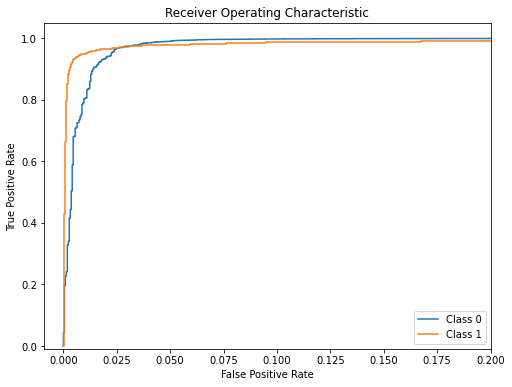

In [32]:
# let's plot the ROC curve

from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}

fig = plt.figure(figsize=(8, 6))

for i in range(num_classes):
    
    '''fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i]) 
        
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')'''
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i]) 
        
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
    
plt.xlim([-0.009, 0.2])
plt.ylim([-0.009, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()